In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, accuracy_score
import cv2

### Reading the images

In [24]:
tumor = []
path = './data/brain_tumor_images/yes/*.jpg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([ r, g, b])
    tumor.append(img)

In [27]:
healthy = []
path = './data/brain_tumor_images/no/*.jpg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([ r, g, b])
    healthy.append(img)

In [36]:
healthy = np.array(healthy)
tumor = np.array(tumor)
all = np.concatenate((healthy, tumor))

In [37]:
all.shape

(245, 128, 128, 3)

### Visualization

1st image

In [ ]:
healthy[0]

(128, 128, 3)

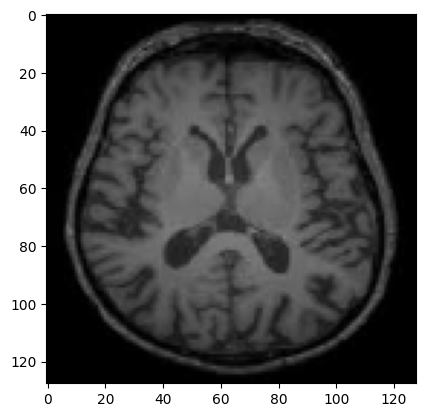

In [41]:
plt.imshow(healthy[0])

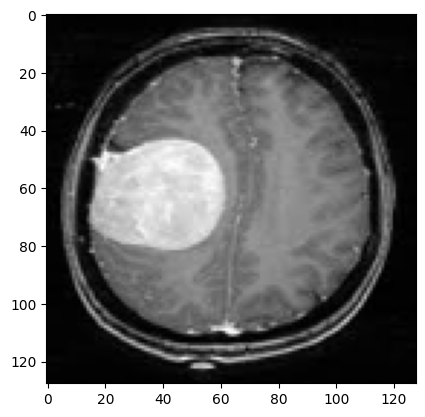

In [42]:
plt.imshow(tumor[0])

In [50]:
def plot_random(healthy, tumor, nums=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], nums, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], nums, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(nums):
        plt.subplot(1, nums, i + 1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(nums):
        plt.subplot(1, nums, i + 1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])

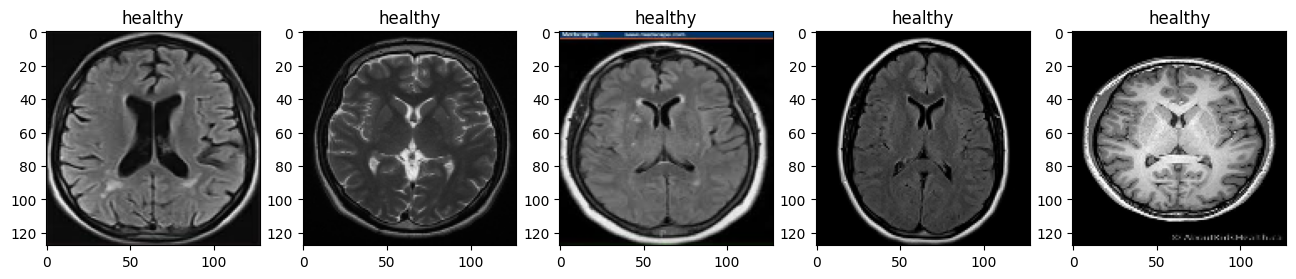

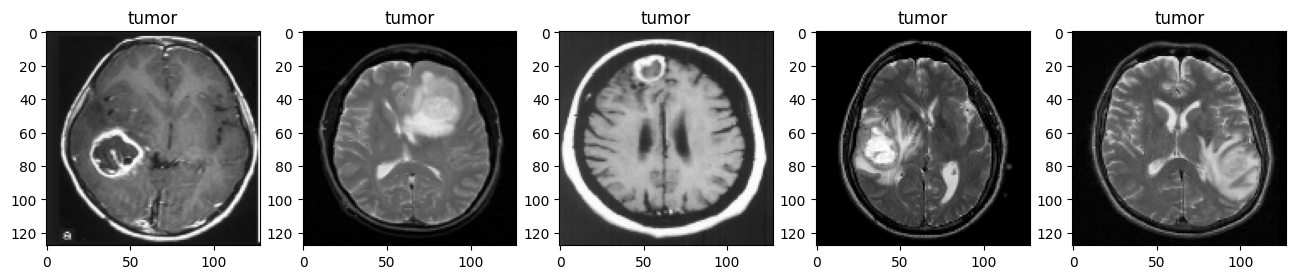

In [53]:
plot_random(healthy, tumor)

### Create Torch Dataset Class

In [54]:
class Dataset(object):

    def __getitem__(self, index):
        raise NotImplementedError
    
    def __len__(self):
        raise NotImplementedError
    
    def __add__(self, other):
        return ConcatDataset([self, other])

### Create MRI Custom Dataset Class

In [ ]:
class MRI(Dataset):
    def __init__(self):

        tumor = []
        healthy = []

        for f in glob.iglob('./data/brain_tumor_images/yes/*.jpg'):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([ r, g, b])
            tumor.append(img)

        for f in glob.iglob('./data/brain_tumor_images/no/*.jpg'):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([ r, g, b])
            healthy.append(img)

        # images
        healthy = np.array(healthy, dtype= np.float32)
        tumor = np.array(tumor, dtype = np.float32)

        #labels
        tumor_label = np.ones(tumor.shape[0], dtype = np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype = np.float32)

        # Concatenates
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label), axis=0)
    
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label': self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images/255.0

In [57]:
mri = MRI()

TypeError: MRI.__init__() missing 2 required positional arguments: 'images' and 'labels'